# Unraveling Emotions In Text Through NLP And Machine Learning

# Importing the libraries

In [112]:
import pandas as pd
import string
import numpy as np
from nltk import ngrams
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

# ISEAR Dataset was loaded here

In [113]:
#load the dataset
Emotion_text_dataset = pd.read_csv('/content/Emotion_Detection_ISEAR.csv',header=None)


# Dtaset Exploration

In [114]:
Emotion_text_dataset

,0,1,2
0,joy,On days when I feel close to my partner and ot...,NaN
1,fear,Every time I imagine that someone I love or I ...,NaN
2,anger,When I had been obviously unjustly treated and...,NaN
3,sadness,When I think about the short time that we live...,NaN
4,disgust,At a gathering I found myself involuntarily si...,NaN
...,...,...,...
7511,shame,Two years back someone invited me to be the tu...,NaN
7512,shame,I had taken the responsibility to do something...,NaN
7513,fear,I was at home and I heard a loud sound of spit...,NaN
7514,guilt,I did not do the homework that the teacher had...,NaN


In [115]:
for col in Emotion_text_dataset .columns:
  print(col, [Emotion_text_dataset [col].unique() if len(Emotion_text_dataset [col].unique())<10 else "Not a Category"])


0 [array(['joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt'],
      dtype=object)]
1 ['Not a Category']
2 [array([nan, ' I was convinced to be right.',
       ' he died of laryngeal cancer.', ' an important task.'],
      dtype=object)]


In [116]:
Emotion_text_dataset.head()

,0,1,2
0,joy,On days when I feel close to my partner and ot...,NaN
1,fear,Every time I imagine that someone I love or I ...,NaN
2,anger,When I had been obviously unjustly treated and...,NaN
3,sadness,When I think about the short time that we live...,NaN
4,disgust,At a gathering I found myself involuntarily si...,NaN


In [117]:
#CHECKING ID DATASETS CONTAINS NULL VALUES
print(Emotion_text_dataset.isnull().sum())

0       0
1       0
2    7513
dtype: int64


# here Removing the null values from the data set and specifying the column names

In [118]:

columns = [0,1]
new_Emotion_text_dataset = Emotion_text_dataset[columns]
new_Emotion_text_dataset = new_Emotion_text_dataset[pd.notnull(Emotion_text_dataset[1])]
new_Emotion_text_dataset.columns = ['Emotion','Text']
new_Emotion_text_dataset.head()

,Emotion,Text
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


# Distribution of emotions in our emotion text dataset

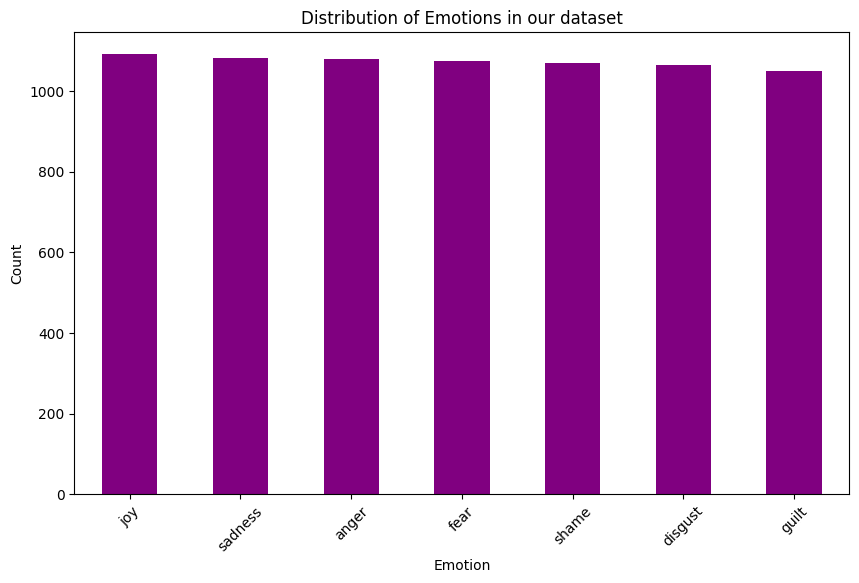

In [119]:
import matplotlib.pyplot as plt

# Count the occurrences of each emotion
emotion_counts = new_Emotion_text_dataset['Emotion'].value_counts()

# Plotting the distribution of emotions
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar', color='purple')
plt.title('Distribution of Emotions in our dataset')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#To get the plot of the emotion distribution in data

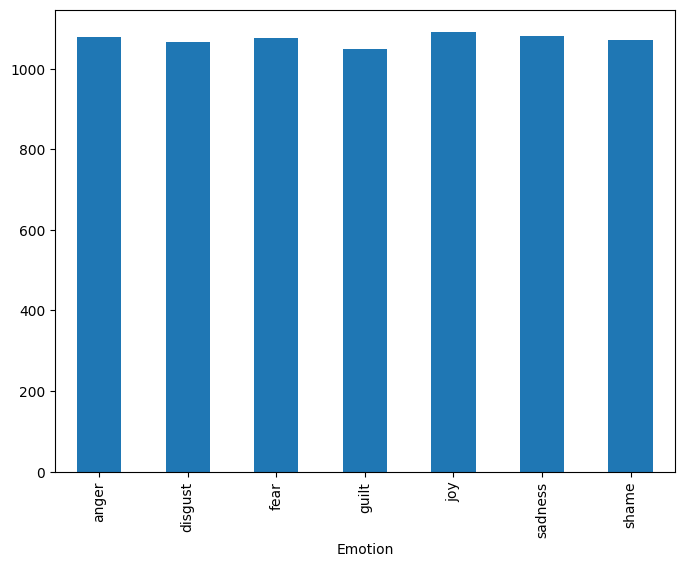

In [120]:

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
new_Emotion_text_dataset.groupby('Emotion').Text.count().plot.bar(ylim=0)
plt.show()

# Word Clouds for Text Visualization
Word clouds can provide a visual representation of the most common words in our text data. They are useful for gaining insight into the frequently occurring words associated with different emotions.

In [121]:

# Initialize an empty dictionary to store text by emotion
text_by_emotion = {}

# Iterate over unique emotions
for emotion in new_Emotion_text_dataset['Emotion'].unique():
    # Filter texts for the current emotion
    texts_for_emotion = new_Emotion_text_dataset[new_Emotion_text_dataset['Emotion'] == emotion]['Text']
    # Concatenate texts for the current emotion into a single string
    concatenated_text = ' '.join(texts_for_emotion)
    # Store the concatenated text for the current emotion in the dictionary
    text_by_emotion[emotion] = concatenated_text


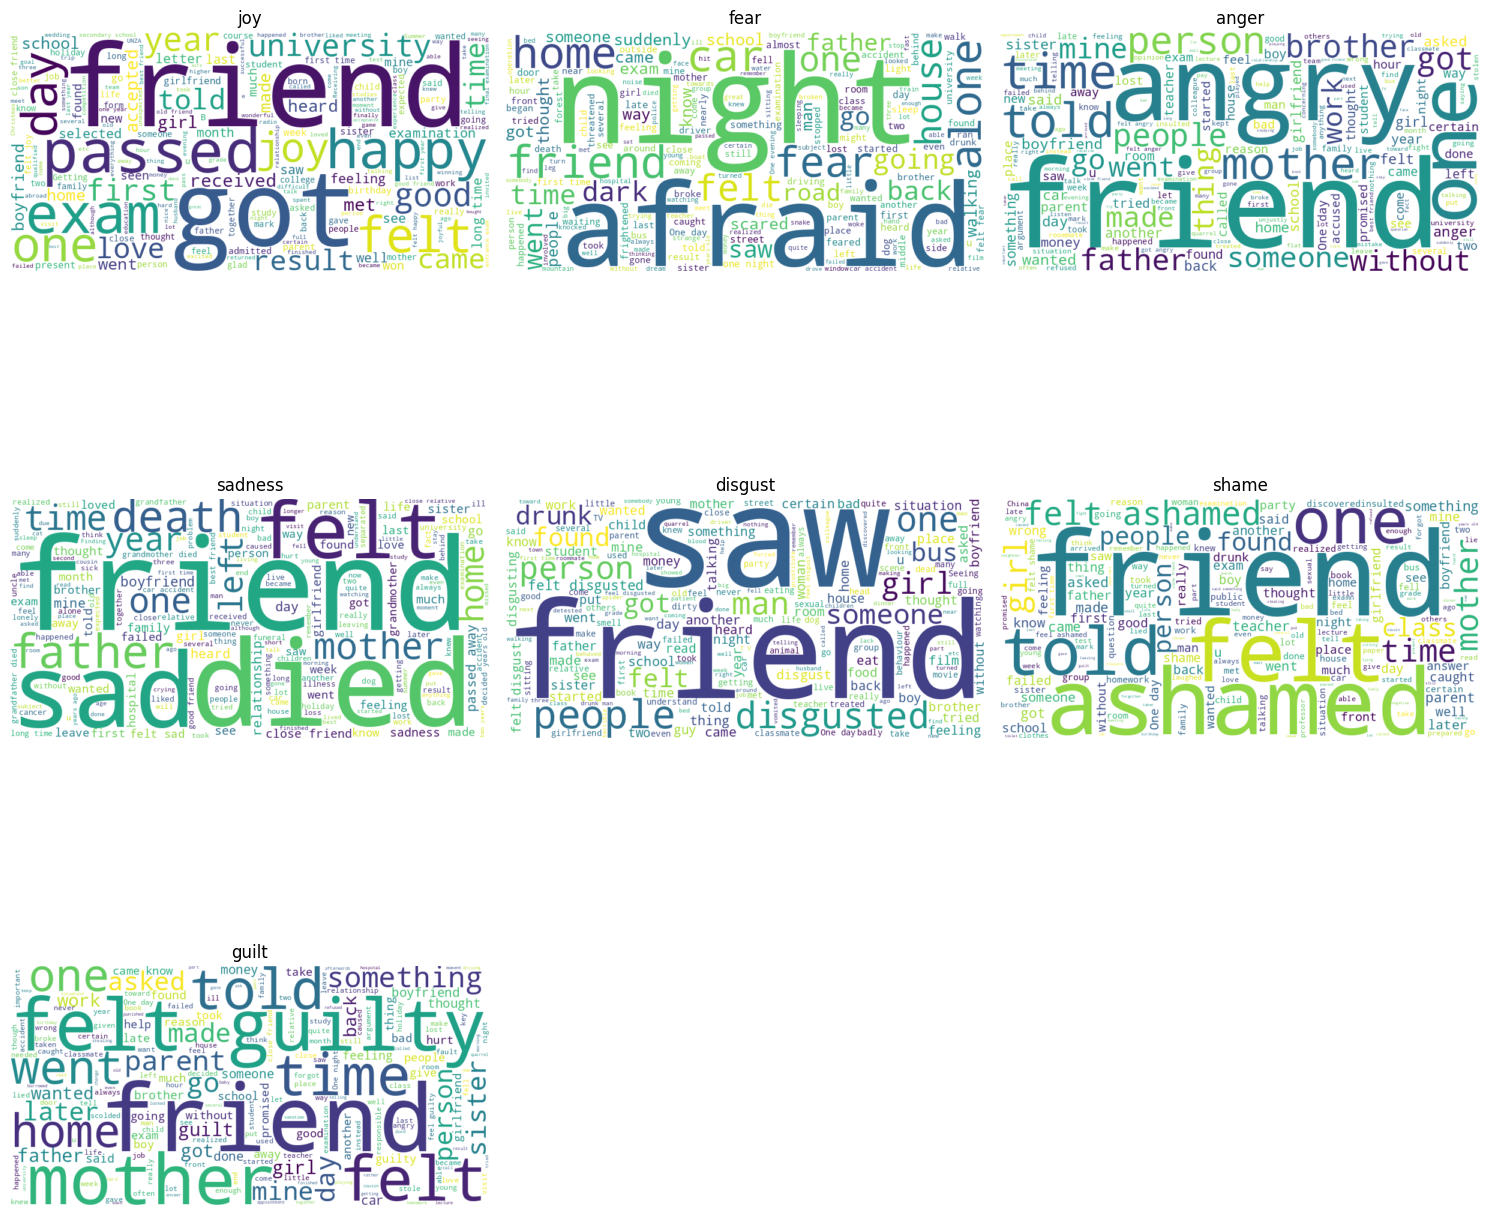

In [122]:
from wordcloud import WordCloud

# Calculate the number of rows and columns for subplots
num_emotions = len(text_by_emotion)
num_rows = (num_emotions - 1) // 3 + 1
num_cols = min(num_emotions, 3)

plt.figure(figsize=(15, 5*num_rows))
for i, (emotion, text) in enumerate(text_by_emotion.items(), 1):
    plt.subplot(num_rows, num_cols, i)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(emotion)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [123]:
# here we are Verifying the data
new_Emotion_text_dataset['Text']
new_Emotion_text_dataset['Emotion']

0           joy
1          fear
2         anger
3       sadness
4       disgust
         ...   
7511      shame
7512      shame
7513       fear
7514      guilt
7515       fear
Name: Emotion, Length: 7516, dtype: object

# SNS PAIPLOT VISUALIAZATION

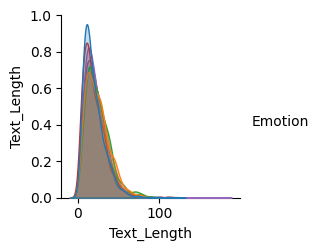

In [124]:
import seaborn as sns
# Calculate text lengths
new_Emotion_text_dataset['Text_Length'] = new_Emotion_text_dataset['Text'].apply(lambda x: len(x.split()))

# Plot pairplot
sns.pairplot(new_Emotion_text_dataset, hue='Emotion', vars=['Text_Length'])
plt.show()


# Histogram of Text Length:
Plotting histograms of the length of text associated with each emotion can give insights into the distribution of text length across different emotions.

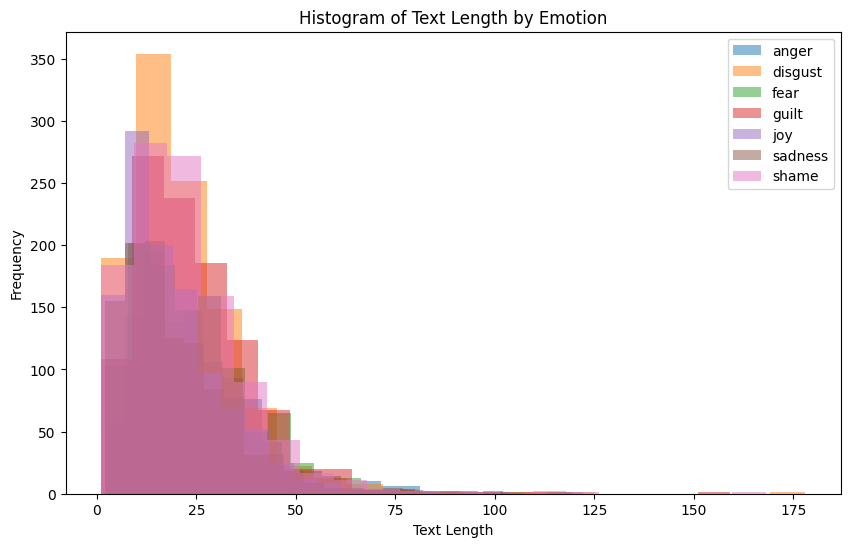

In [125]:
# Calculating the text lengths in our dataset
new_Emotion_text_dataset['Text_Length'] = new_Emotion_text_dataset['Text'].apply(lambda x: len(x.split()))

# Plot histogram of text lengths by emotion
plt.figure(figsize=(10, 6))
for emotion, group in new_Emotion_text_dataset.groupby('Emotion'):
    plt.hist(group['Text_Length'], bins=20, alpha=0.5, label=emotion)

plt.title('Histogram of Text Length by Emotion')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Boxplot of Text Length by Emotion:
Boxplots can provide a visual summary of the distribution of text lengths for each emotion.

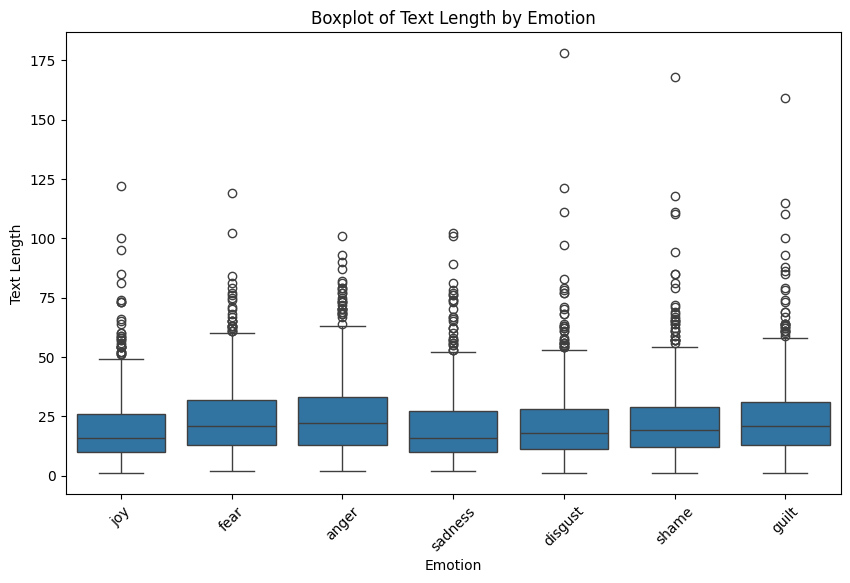

In [126]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Emotion', y='Text_Length', data=new_Emotion_text_dataset)
plt.title('Boxplot of Text Length by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Text Length')
plt.xticks(rotation=45)
plt.show()

# DATA PREPROCESSING

# Tokenization,removing new lines,punctuations

In [127]:
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string


In [128]:



#function
def Function_to_have_list_tokenized_list(input_dataframe):
    tokenizedList=[]
    for i in range(0,len(input_dataframe)):
        current_text_in_dataset=input_dataframe[1].iloc[i]
        current_text_in_dataset=current_text_in_dataset.replace('\n','')
        current_tokenized_messages=word_tokenize(current_text_in_dataset)
        tokenizedList.append(current_tokenized_messages)

    tokenziedListWithoutPunct=[]
    list_of_punctuations=list(string.punctuation)
    for i in range(0,len(tokenizedList)):
        current_list_in_our_dataset=tokenizedList[i]
        newList_without_stop_words=[] #this is the list without having stopwords
        for word in current_list_in_our_dataset:
            if (word.lower() not in list_of_punctuations):
                newList_without_stop_words.append(word.lower())
        tokenziedListWithoutPunct.append(newList_without_stop_words)

#Stemming
    mystemmer=PorterStemmer()
    tokenziedStemmed=[]
    for i in range(0,len(tokenziedListWithoutPunct)):
        current_list_in_our_dataset=tokenziedListWithoutPunct[i]
        newList_without_stop_words=[]
        for word in current_list_in_our_dataset:
            newList_without_stop_words.append(mystemmer.stem(word))
        tokenziedStemmed.append(newList_without_stop_words)
    return tokenziedStemmed

# Preprocessing the sentence which we input to predict the emotion

In [129]:

def transformSentence(sentence):
    sentence = []
    sentence=sentence.replace('\n','')
    sentenceTokenized=word_tokenize(sentence)
    sentence.append(sentenceTokenized)
    sentences_without_punctuations = []
    list_of_punctuations = list(string.punctuation)
    cursentenceList = sentence[0]
    newsentenceList = []
    for word in cursentenceList:
        if (word.lower() not in list_of_punctuations):
            newsentenceList.append(word.lower())
    sentences_without_punctuations.append(newsentenceList)
    mystemmer = PorterStemmer()
    tokenziedStemmed = []
    for i in range(0,len(sentences_without_punctuations)):
        current_list=sentences_without_punctuations[i]
        newList_without_stop_words=[]
        for word in current_list:
            newList_without_stop_words.append(mystemmer.stem(word))
        tokenziedStemmed.append(newList_without_stop_words)
    return tokenziedStemmed

In [130]:
import nltk
nltk.download('punkt')
new_Emotion_text_dataset['Text']=Function_to_have_list_tokenized_list(Emotion_text_dataset)
new_Emotion_text_dataset['Text']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0       [on, day, when, i, feel, close, to, my, partne...
1       [everi, time, i, imagin, that, someon, i, love...
2       [when, i, had, been, obvious, unjustli, treat,...
3       [when, i, think, about, the, short, time, that...
4       [at, a, gather, i, found, myself, involuntaril...
                              ...                        
7511    [two, year, back, someon, invit, me, to, be, t...
7512    [i, had, taken, the, respons, to, do, someth, ...
7513    [i, wa, at, home, and, i, heard, a, loud, soun...
7514    [i, did, not, do, the, homework, that, the, te...
7515    [i, had, shout, at, my, younger, brother, and,...
Name: Text, Length: 7516, dtype: object

#splitting the dataset intlo testing and training

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(new_Emotion_text_dataset['Text'],new_Emotion_text_dataset['Emotion'], test_size=.3,random_state=1)
X_train

2158    [when, i, felt, i, had, let, my, parent, down,...
5567    [onc, when, i, wa, babysit, for, some, neighbo...
4398     [wait, for, my, mark, in, a, difficult, subject]
2146    [one, night, go, downstair, and, hear, a, stro...
5071    [everi, time, i, wa, around, thi, one, person,...
                              ...                        
905     [i, return, home, late, from, a, parti, last, ...
5192    [when, the, brother-in-law, of, a, girlfriend,...
3980    [i, wa, take, a, shower, in, a, cubicl, in, fr...
235                      [someon, vomit, on, the, street]
5157    [when, my, first, sexual, intercours, turn, ou...
Name: Text, Length: 5261, dtype: object

# Naive bayes

#Extracting features for Naive Bayes model

In [132]:
#Extracting features for Naive Bayes

#Function to pass the list to the Tfidf vectorizer
def returnPhrase(inputList):
    return inputList


from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_for_naive_bayes = TfidfVectorizer(analyzer='word',tokenizer=returnPhrase,preprocessor=returnPhrase,token_pattern=None,ngram_range=(1,3))
vectorizer_for_naive_bayes.fit(X_train)
Training_dataset_transformed=vectorizer_for_naive_bayes.transform(X_train).toarray()
Testing_dataset_transformed=vectorizer_for_naive_bayes.transform(X_test).toarray()


# Printing the shape of the transformed data
print("Shape of transformedTrain:", Training_dataset_transformed.shape)
print("Shape of transformedTest:", Testing_dataset_transformed.shape)

Shape of transformedTrain: (5261, 124993)
Shape of transformedTest: (2255, 124993)


# Training MultinomialNB and evaluating the performance of our model

In [177]:

from sklearn.naive_bayes import MultinomialNB
current_alpha_value=0.33
Naive_bayes_classifier  =  MultinomialNB(alpha=current_alpha_value)
Naive_bayes_classifier.fit(Training_dataset_transformed,Y_train)

Prediction_for_test_dataset =   Naive_bayes_classifier.predict(Testing_dataset_transformed)

print('Accuracy for the Naive Bayes for emotion detection dataset ')
print(np.sum(Prediction_for_test_dataset==Y_test)/len(Y_test))

Accuracy for the Naive Bayes for emotion detection dataset 
0.5835920177383592


In [178]:
# Calculate accuracy for Naive Bayes
accuracy_nb = np.sum(Prediction_for_test_dataset == Y_test) / len(Y_test)
print('Accuracy for Naive Bayes:', accuracy_nb)


Accuracy for Naive Bayes: 0.5835920177383592


# Tuning alpha using GridSearchCV

In [134]:


from sklearn import metrics
from sklearn.model_selection import GridSearchCV

alpha_values = [0.01, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0]
param_grid = {'alpha': alpha_values}
grid_search = GridSearchCV(estimator=MultinomialNB(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(Training_dataset_transformed, Y_train)

# Printing the best alpha value and its corresponding accuracy
print("Best Alpha:", grid_search.best_params_['alpha'])
print("Best Accuracy:", grid_search.best_score_)

Best Alpha: 0.5
Best Accuracy: 0.5658592686476084


# Naive Bayes Model Evaluation

# Finding Precision,recall,and f1-score for Naive Bayes

In [135]:

print('Classification Report for the Naive Bayes for emotion detection dataset')
print(metrics.classification_report(Y_test, Prediction_for_test_dataset))

Classification Report for the Naive Bayes for emotion detection dataset
              precision    recall  f1-score   support

       anger       0.51      0.47      0.49       331
     disgust       0.72      0.50      0.59       324
        fear       0.62      0.70      0.66       311
       guilt       0.43      0.62      0.51       299
         joy       0.69      0.69      0.69       323
     sadness       0.68      0.60      0.64       351
       shame       0.52      0.51      0.52       316

    accuracy                           0.58      2255
   macro avg       0.60      0.58      0.58      2255
weighted avg       0.60      0.58      0.59      2255



# Classification Report for Naive Bayes model

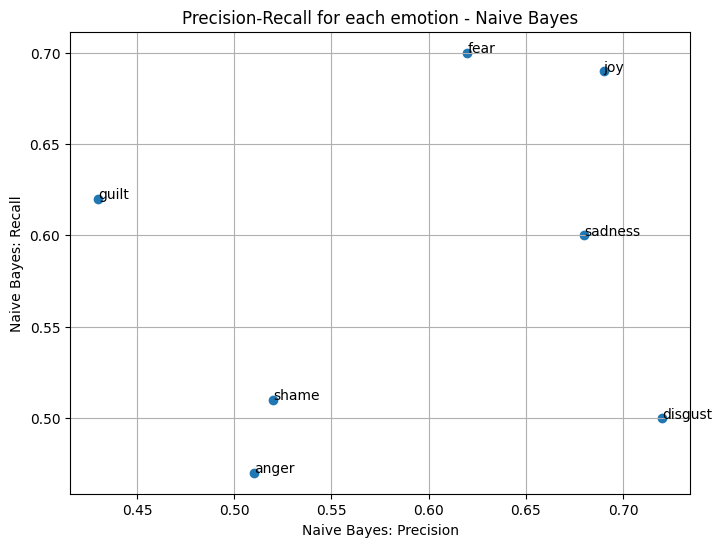

In [136]:

import pandas as pd
import matplotlib.pyplot as plt

def Naive_bayes_classification_report(rep):
    classification_report_data = []
    lines = rep.split('\n')
    for line in lines[2:-3]:
        r = {}
        r_data = line.split()
        if len(r_data) < 5:
            continue
        r['class'] = r_data[0]
        r['precision'] = float(r_data[1])
        r['recall'] = float(r_data[2])
        r['f1-score'] = float(r_data[3])
        r['support'] = float(r_data[4])
        classification_report_data.append(r)
    classification_report_dataset = pd.DataFrame.from_dict(classification_report_data)

    plt.figure(figsize=(8, 6))
    plt.scatter(classification_report_dataset['precision'], classification_report_dataset['recall'])
    for i, txt in enumerate(classification_report_dataset['class']):
        plt.text(classification_report_dataset['precision'][i], classification_report_dataset['recall'][i], txt)
    plt.xlabel('Naive Bayes: Precision')
    plt.ylabel('Naive Bayes: Recall')
    plt.title('Precision-Recall for each emotion - Naive Bayes')
    plt.grid(True)
    plt.show()

# 'Prediction_for_test_dataset' is the variable containing predictions
# and 'Y_test' is the ground truth labels
report = metrics.classification_report(Y_test, Prediction_for_test_dataset)
Naive_bayes_classification_report(report)


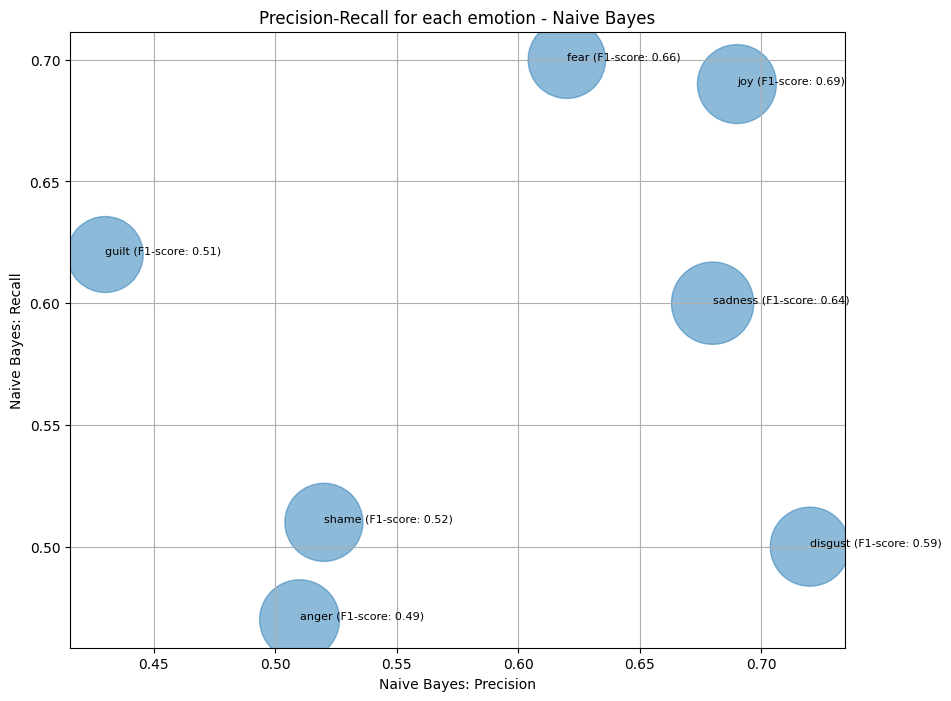

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

def Naive_bayes_classification_report(rep):
    classification_report_data = []
    lines = rep.split('\n')
    for line in lines[2:-3]:
        r = {}
        r_data = line.split()
        if len(r_data) < 5:
            continue
        r['class'] = r_data[0]
        r['precision'] = float(r_data[1])
        r['recall'] = float(r_data[2])
        r['f1-score'] = float(r_data[3])
        r['support'] = float(r_data[4])
        classification_report_data.append(r)
    classification_report_dataset = pd.DataFrame.from_dict(classification_report_data)

    plt.figure(figsize=(10, 8))
    plt.scatter(classification_report_dataset['precision'], classification_report_dataset['recall'], s=classification_report_dataset['support']*10, alpha=0.5)
    for i, txt in enumerate(classification_report_dataset['class']):
        plt.text(classification_report_dataset['precision'][i], classification_report_dataset['recall'][i],
                 f"{txt} (F1-score: {classification_report_dataset['f1-score'][i]:.2f})", fontsize=8)
    plt.xlabel('Naive Bayes: Precision')
    plt.ylabel('Naive Bayes: Recall')
    plt.title('Precision-Recall for each emotion - Naive Bayes')
    plt.grid(True)
    plt.show()

# 'Prediction_for_test_dataset' is the variable containing predictions
# and 'Y_test' is the ground truth labels
report = metrics.classification_report(Y_test, Prediction_for_test_dataset)
Naive_bayes_classification_report(report)


 Precision recall curve for our Naive bayes model


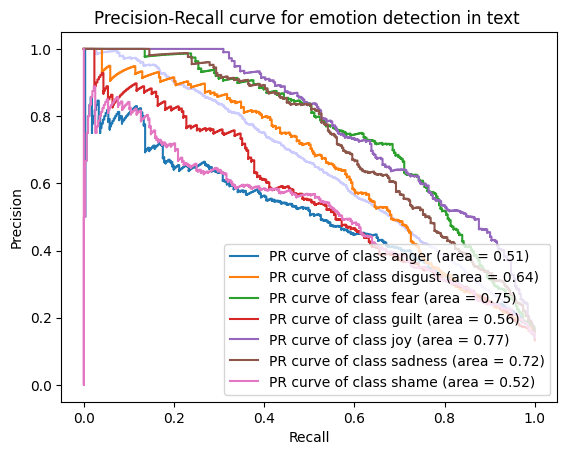

In [138]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Get unique classes from Y_test
classes = sorted(set(Y_test))

y_scores = Naive_bayes_classifier.predict_proba(Testing_dataset_transformed)

# Binarize the labels for each class using the one-vs-rest strategy
Y_test_binarized = label_binarize(Y_test, classes=classes)

# Compute Precision-Recall curve and average precision for each class for our emotion detection dataset
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(Y_test_binarized[:, i], y_scores[:, i])
    average_precision[i] = average_precision_score(Y_test_binarized[:, i], y_scores[:, i])

# Compute micro-average Precision-Recall curve and average precision
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test_binarized.ravel(), y_scores.ravel())
average_precision["micro"] = average_precision_score(Y_test_binarized, y_scores, average="micro")

print( " Precision recall curve for our Naive bayes model")
# Plot Precision-Recall curve for each class
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post', color='b', alpha=0.2)
for i in range(len(classes)):
    plt.step(recall[i], precision[i], where='post', label='PR curve of class {0} (area = {1:0.2f})'
             ''.format(classes[i], average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for emotion detection in text ')
plt.legend(loc="lower right")
plt.show()


# Support Vector machine model

#Extracting features for  Support Vector machine

In [139]:
#Function to pass the list to the Tfidf vectorizer
def returnPhrase_svm(inputList):
    return inputList

vectorizer_for_svm = TfidfVectorizer(analyzer='word',tokenizer=returnPhrase_svm,preprocessor= returnPhrase_svm,token_pattern=None,ngram_range=(1,3))
vectorizer_for_svm.fit(X_train)

Training_dataset_transformed_svm =vectorizer_for_svm.transform(X_train).toarray()
Testing_dataset_transformed_svm =vectorizer_for_svm.transform(X_test).toarray()


# Printing the shape of the transformed data
print("Shape of transformedTrain:", Training_dataset_transformed_svm.shape)
print("Shape of transformedTest:", Testing_dataset_transformed_svm.shape)

Shape of transformedTrain: (5261, 124993)
Shape of transformedTest: (2255, 124993)


# Training the SVM Model and Evaluating the performance

In [180]:

from sklearn import svm

current_alpha_value = 4  #cost factor in SVM
Support_vector_machine_classifier=svm.LinearSVC(C=current_alpha_value)
Support_vector_machine_classifier.fit(Training_dataset_transformed_svm,Y_train)
Prediction_for_test_dataset_svm =Support_vector_machine_classifier.predict(Testing_dataset_transformed_svm)
print('Accuracy for the Support Vector Machine for emotion detection dataset ')

print(np.sum(Prediction_for_test_dataset_svm==Y_test)/len(Y_test))


Accuracy for the Support Vector Machine for emotion detection dataset 
0.6088691796008869


In [181]:
# Calculate accuracy for Naive Bayes
accuracy_svm = np.sum(Prediction_for_test_dataset == Y_test) / len(Y_test)
print('Accuracy for Support vector machine:', accuracy_svm)


Accuracy for Support vector machine: 0.5835920177383592


# Support Vector Machine  Model Evaluation

# precision,recall and f1-score for each emotion for support vector machine

In [141]:

print('Classification Report for the Support Vector Machine for emotion detection dataset')
print(metrics.classification_report(Y_test, Prediction_for_test_dataset_svm ))

Classification Report for the Support Vector Machine for emotion detection dataset
              precision    recall  f1-score   support

       anger       0.54      0.55      0.54       331
     disgust       0.65      0.59      0.62       324
        fear       0.65      0.71      0.68       311
       guilt       0.51      0.56      0.53       299
         joy       0.71      0.70      0.70       323
     sadness       0.66      0.64      0.65       351
       shame       0.55      0.51      0.53       316

    accuracy                           0.61      2255
   macro avg       0.61      0.61      0.61      2255
weighted avg       0.61      0.61      0.61      2255



Classification Report for Support Vector Machine

Classification Report for Support Vector Machine :


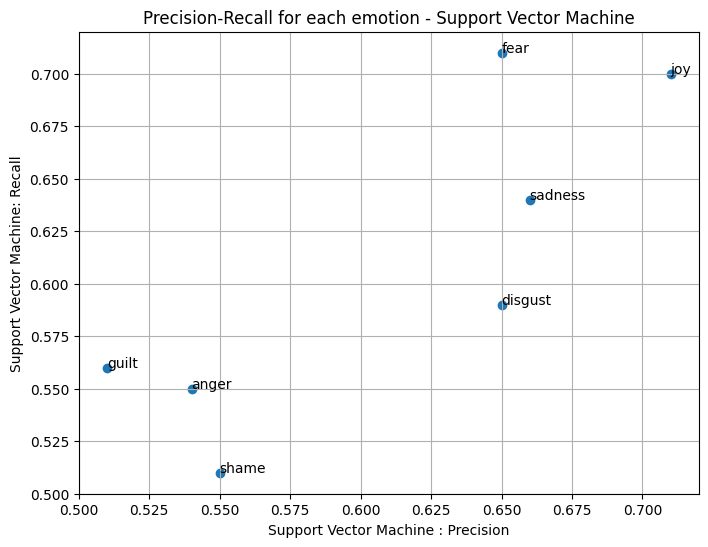

In [142]:
print("Classification Report for Support Vector Machine :")

def support_vector_machine_classification_report(rep):
    svm_report_data = []
    lines = rep.split('\n')
    for line in lines[2:-3]:
        r_data = line.split()
        r_data = list(filter(None, r_data))
        if len(r_data) < 5:
            continue
        r = {}
        r['class'] = r_data[0]
        r['precision'] = float(r_data[1])
        r['recall'] = float(r_data[2])
        r['f1-score'] = float(r_data[3])
        r['support'] = float(r_data[4])
        svm_report_data.append(r)
    svm_report_dataset = pd.DataFrame.from_dict(svm_report_data)

    plt.figure(figsize=(8, 6))
    plt.scatter(svm_report_dataset['precision'], svm_report_dataset['recall'])
    for i, txt in enumerate(svm_report_dataset['class']):
        plt.text(svm_report_dataset['precision'][i], svm_report_dataset['recall'][i], txt)
    plt.xlabel('Support Vector Machine : Precision')
    plt.ylabel('Support Vector Machine: Recall')
    plt.title('Precision-Recall for each emotion - Support Vector Machine')
    plt.grid(True)
    plt.show()

report = metrics.classification_report(Y_test, Prediction_for_test_dataset_svm)
support_vector_machine_classification_report(report)


Classification Report for Support Vector Machine  for each emotion :


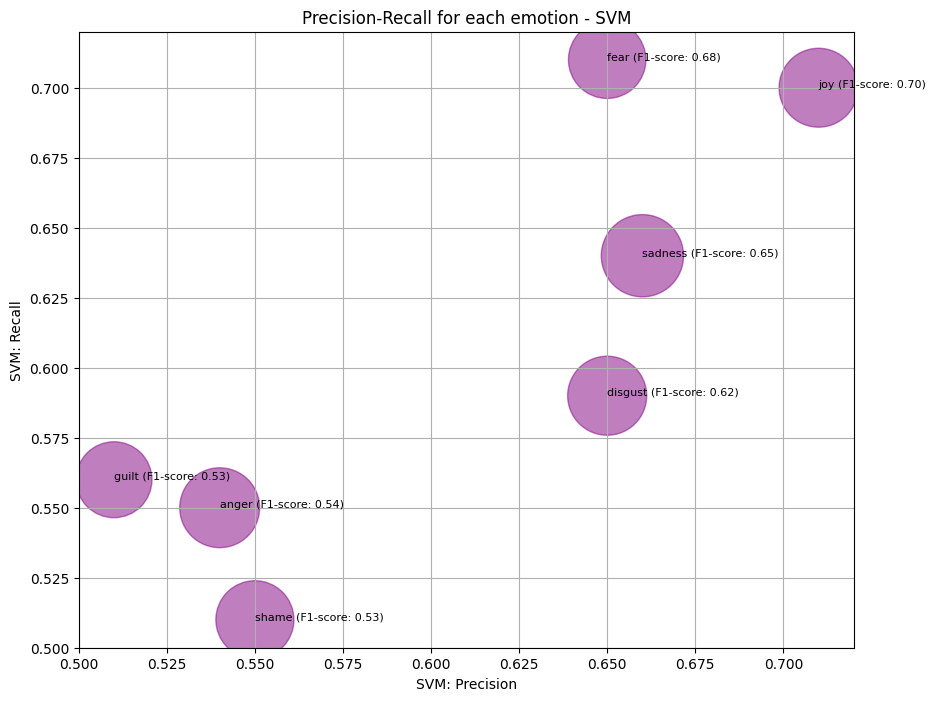

In [143]:

print("Classification Report for Support Vector Machine  for each emotion :")
def SVM_classification_report(rep):
    classification_report_data = []
    lines = rep.split('\n')
    for line in lines[2:-3]:
        r = {}
        r_data = line.split()
        if len(r_data) < 5:
            continue
        r['class'] = r_data[0]
        r['precision'] = float(r_data[1])
        r['recall'] = float(r_data[2])
        r['f1-score'] = float(r_data[3])
        r['support'] = float(r_data[4])
        classification_report_data.append(r)
    classification_report_dataset = pd.DataFrame.from_dict(classification_report_data)

    plt.figure(figsize=(10, 8))
    plt.scatter(classification_report_dataset['precision'], classification_report_dataset['recall'], s=classification_report_dataset['support']*10, alpha=0.5,color= 'purple')
    for i, txt in enumerate(classification_report_dataset['class']):
        plt.text(classification_report_dataset['precision'][i], classification_report_dataset['recall'][i],
                 f"{txt} (F1-score: {classification_report_dataset['f1-score'][i]:.2f})", fontsize=8)
    plt.xlabel('SVM: Precision')
    plt.ylabel('SVM: Recall')
    plt.title('Precision-Recall for each emotion - SVM')
    plt.grid(True)
    plt.show()

# 'Prediction_for_test_dataset_svm' is the variable containing predictions
# and 'Y_test' is the ground truth labels
report_svm = metrics.classification_report(Y_test, Prediction_for_test_dataset_svm)
SVM_classification_report(report_svm)


# Precision-Recall curve for emotion detection in text using SVM model

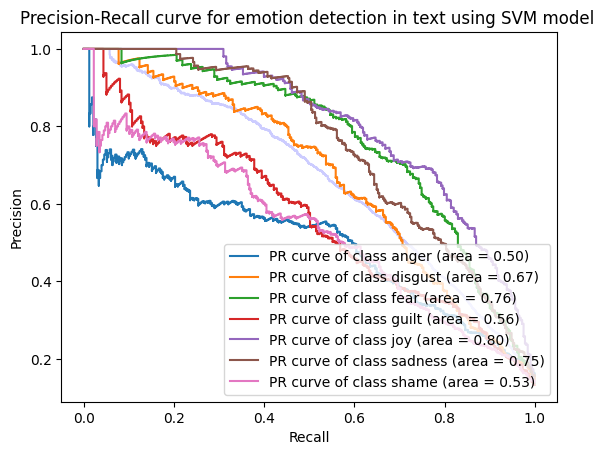

In [144]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.calibration import CalibratedClassifierCV
import numpy as np

# Calibrate the classifier to get probabilities
calibrated_svc = CalibratedClassifierCV(Support_vector_machine_classifier, method='sigmoid', cv='prefit')
calibrated_svc.fit(Training_dataset_transformed_svm, Y_train)

# Get class probabilities using calibrated classifier
y_scores = calibrated_svc.predict_proba(Testing_dataset_transformed_svm)

# Get unique classes from Y_test
classes = sorted(set(Y_test))

# Binarize the labels for each class using the one-vs-rest strategy
Y_test_binarized = label_binarize(Y_test, classes=classes)

# Compute Precision-Recall curve and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(Y_test_binarized[:, i], y_scores[:, i])
    average_precision[i] = average_precision_score(Y_test_binarized[:, i], y_scores[:, i])

# Compute micro-average Precision-Recall curve and average precision
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test_binarized.ravel(), y_scores.ravel())
average_precision["micro"] = average_precision_score(Y_test_binarized, y_scores, average="micro")

# Plot Precision-Recall curve for each class
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post', color='b', alpha=0.2)
for i in range(len(classes)):
    plt.step(recall[i], precision[i], where='post', label=f'PR curve of class {classes[i]} (area = {average_precision[i]:0.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for emotion detection in text using SVM model ')
plt.legend(loc="lower right")
plt.show()


# DEEP LEARNING MODEL LSTM MODEL

In [145]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


# Tokenization and padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(new_Emotion_text_dataset['Text'])
X = tokenizer.texts_to_sequences(new_Emotion_text_dataset['Text'])
X = pad_sequences(X)

# Encoding labels
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(new_Emotion_text_dataset['Emotion'])

# Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [146]:
new_Emotion_text_dataset.columns

Index(['Emotion', 'Text', 'Text_Length'], dtype='object')

In [147]:

# LSTM deep_learning_model_lstm
deep_learning_model_lstm = Sequential()
deep_learning_model_lstm.add(Embedding(len(tokenizer.word_index)+1, 100, input_length=X.shape[1]))
deep_learning_model_lstm.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
deep_learning_model_lstm.add(Dense(64, activation='relu'))
deep_learning_model_lstm.add(Dropout(0.5))
deep_learning_model_lstm.add(Dense(len(label_encoder.classes_), activation='softmax'))

deep_learning_model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the deep_learning_model_lstm
deep_learning_model_lstm.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=64)


Epoch 1/10
83/83 [==============================] - 63s 712ms/step - loss: 1.9274 - accuracy: 0.1899 - val_loss: 1.8653 - val_accuracy: 0.2989
Epoch 2/10
83/83 [==============================] - 49s 596ms/step - loss: 1.6617 - accuracy: 0.3553 - val_loss: 1.5256 - val_accuracy: 0.4035
Epoch 3/10
83/83 [==============================] - 50s 605ms/step - loss: 1.2696 - accuracy: 0.5202 - val_loss: 1.3718 - val_accuracy: 0.4878
Epoch 4/10
83/83 [==============================] - 50s 598ms/step - loss: 1.0019 - accuracy: 0.6354 - val_loss: 1.3033 - val_accuracy: 0.5322
Epoch 5/10
83/83 [==============================] - 50s 599ms/step - loss: 0.8113 - accuracy: 0.7288 - val_loss: 1.3539 - val_accuracy: 0.5539
Epoch 6/10
83/83 [==============================] - 51s 613ms/step - loss: 0.6644 - accuracy: 0.7839 - val_loss: 1.3951 - val_accuracy: 0.5685
Epoch 7/10
83/83 [==============================] - 50s 598ms/step - loss: 0.6026 - accuracy: 0.8033 - val_loss: 1.4923 - val_accuracy: 0.5570

In [148]:
# Prediction
Y_pred_probabilities = deep_learning_model_lstm.predict(X_test)
Y_pred = np.argmax(Y_pred_probabilities, axis=1)

# Evaluate the model
loss, accuracy = deep_learning_model_lstm.evaluate(X_test, Y_test)
print('Accuracy for deep learning model lstm:', accuracy)


71/71 [==============================] - 6s 80ms/step - loss: 1.7046 - accuracy: 0.5499
Accuracy for deep learning model lstm: 0.5498891472816467


In [149]:
# Classification report
print('Classification Report:')
print(classification_report(Y_test, Y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.41      0.45       331
           1       0.59      0.55      0.57       324
           2       0.67      0.62      0.65       311
           3       0.46      0.53      0.49       299
           4       0.67      0.60      0.63       323
           5       0.53      0.63      0.58       351
           6       0.47      0.50      0.48       316

    accuracy                           0.55      2255
   macro avg       0.55      0.55      0.55      2255
weighted avg       0.55      0.55      0.55      2255



71/71 [==============================] - 5s 72ms/step


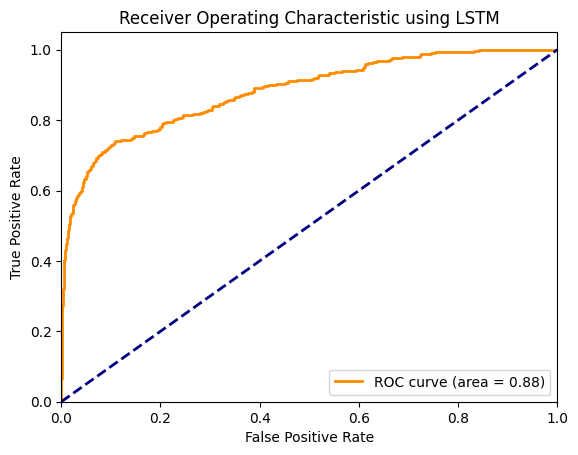

In [150]:
from sklearn.metrics import roc_curve, auc

# Prediction probabilities
Y_pred_probabilities = deep_learning_model_lstm.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
Y_test_onehot = np.zeros((Y_test.size, len(label_encoder.classes_)))
for i, label in enumerate(Y_test):
    Y_test_onehot[i, label] = 1
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(Y_test_onehot[:, i], Y_pred_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
plt.plot(fpr[2], tpr[2], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic using LSTM')
plt.legend(loc="lower right")
plt.show()


# DEEP LEARNING MODEL RNN

In [151]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

# Tokenization and padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(new_Emotion_text_dataset['Text'])
X = tokenizer.texts_to_sequences(new_Emotion_text_dataset['Text'])
X = pad_sequences(X)

# Encoding labels
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(new_Emotion_text_dataset['Emotion'])



In [152]:

# Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


# RNN Model
rnn_model = Sequential()
rnn_model.add(Embedding(len(tokenizer.word_index)+1, 100, input_length=X.shape[1]))
rnn_model.add(SimpleRNN(100, dropout=0.2, recurrent_dropout=0.2))
rnn_model.add(Dense(64, activation='relu'))
rnn_model.add(Dropout(0.5))
rnn_model.add(Dense(len(label_encoder.classes_), activation='softmax'))

rnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
rnn_model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=64)


Epoch 1/10
83/83 [==============================] - 15s 163ms/step - loss: 2.0159 - accuracy: 0.1382 - val_loss: 1.9451 - val_accuracy: 0.1601
Epoch 2/10
83/83 [==============================] - 14s 165ms/step - loss: 1.9792 - accuracy: 0.1557 - val_loss: 1.9415 - val_accuracy: 0.1676
Epoch 3/10
83/83 [==============================] - 25s 304ms/step - loss: 1.9659 - accuracy: 0.1625 - val_loss: 1.9336 - val_accuracy: 0.1858
Epoch 4/10
83/83 [==============================] - 14s 165ms/step - loss: 1.9403 - accuracy: 0.1745 - val_loss: 1.9227 - val_accuracy: 0.2182
Epoch 5/10
83/83 [==============================] - 13s 163ms/step - loss: 1.9248 - accuracy: 0.1948 - val_loss: 1.8897 - val_accuracy: 0.2452
Epoch 6/10
83/83 [==============================] - 14s 169ms/step - loss: 1.8554 - accuracy: 0.2511 - val_loss: 1.8795 - val_accuracy: 0.2160
Epoch 7/10
83/83 [==============================] - 14s 164ms/step - loss: 1.7302 - accuracy: 0.3129 - val_loss: 1.8456 - val_accuracy: 0.2599

In [155]:
# Evaluate the model
loss, accuracy = rnn_model.evaluate(X_test, Y_test)
print('Accuracy for RNN model:', accuracy)

# Prediction
Y_pred = rnn_model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Decode labels
Y_test_decoded = label_encoder.inverse_transform(Y_test)
Y_pred_decoded = label_encoder.inverse_transform(Y_pred_classes)

# Classification report
print('Classification Report for RNN:')
print(classification_report(Y_test_decoded, Y_pred_decoded))


71/71 [==============================] - 3s 39ms/step - loss: 1.6087 - accuracy: 0.4089
Accuracy for RNN model: 0.4088691771030426
71/71 [==============================] - 4s 42ms/step
Classification Report for RNN:
              precision    recall  f1-score   support

       anger       0.34      0.15      0.21       331
     disgust       0.37      0.57      0.45       324
        fear       0.71      0.50      0.59       311
       guilt       0.27      0.59      0.37       299
         joy       0.53      0.46      0.49       323
     sadness       0.51      0.43      0.47       351
       shame       0.37      0.17      0.23       316

    accuracy                           0.41      2255
   macro avg       0.44      0.41      0.40      2255
weighted avg       0.44      0.41      0.40      2255



In [172]:
# Evaluate the model
loss, accuracy_rnn = rnn_model.evaluate(X_test, Y_test)
print('Accuracy for RNN model:', accuracy_rnn)


71/71 [==============================] - 3s 45ms/step - loss: 1.6087 - accuracy: 0.4089
Accuracy for RNN model: 0.4088691771030426


71/71 [==============================] - 1s 18ms/step


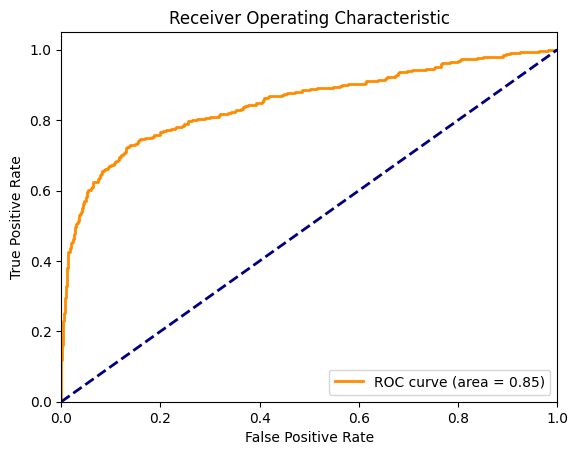

In [156]:
from sklearn.metrics import roc_curve, auc

# Prediction probabilities
Y_pred_probabilities_rnn = rnn_model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(Y_test_onehot[:, i], Y_pred_probabilities_rnn[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
plt.plot(fpr[2], tpr[2], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# LOGISTIC REGRESSION

In [157]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, Y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [174]:
from sklearn.metrics import accuracy_score

# Prediction
Y_pred_logistic = logistic_model.predict(X_test)

# Calculate accuracy
accuracy_LOGISTIC = accuracy_score(Y_test, Y_pred_logistic)
print('Accuracy for Logistic Regression:', accuracy_LOGISTIC)


Accuracy for Logistic Regression: 0.17694013303769401


In [159]:
# Prediction
Y_pred_logistic = logistic_model.predict(X_test)

# Classification report
print('Classification Report for Logistic Regression:')
print(classification_report(Y_test, Y_pred_logistic))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.15      0.10      0.12       331
           1       0.17      0.46      0.25       324
           2       0.18      0.17      0.18       311
           3       0.16      0.09      0.11       299
           4       0.20      0.22      0.21       323
           5       0.23      0.11      0.15       351
           6       0.15      0.09      0.12       316

    accuracy                           0.18      2255
   macro avg       0.18      0.18      0.16      2255
weighted avg       0.18      0.18      0.16      2255



# Classification report for logistic regression

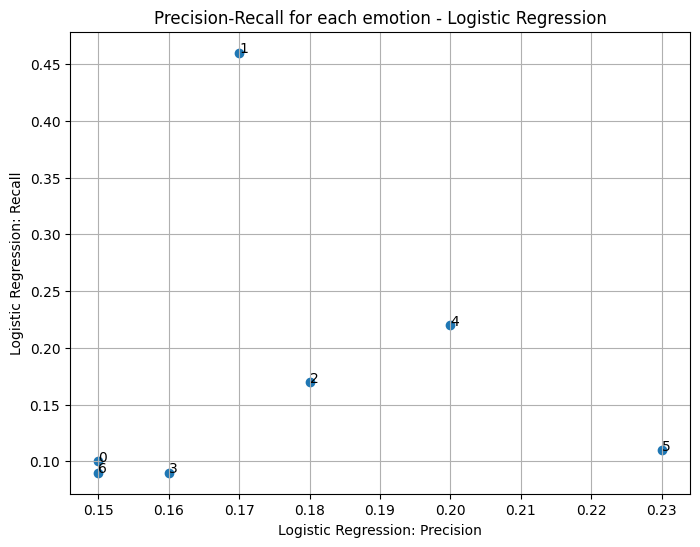

In [160]:

# Precision-Recall plot
def logistic_regression_classification_report(rep):
    lr_report_data = []
    lines = rep.split('\n')
    for line in lines[2:-3]:
        r_data = line.split()
        r_data = list(filter(None, r_data))
        if len(r_data) < 5:
            continue
        r = {}
        r['class'] = r_data[0]
        r['precision'] = float(r_data[1])
        r['recall'] = float(r_data[2])
        r['f1-score'] = float(r_data[3])
        r['support'] = float(r_data[4])
        lr_report_data.append(r)
    lr_report_dataset = pd.DataFrame.from_dict(lr_report_data)

    plt.figure(figsize=(8, 6))
    plt.scatter(lr_report_dataset['precision'], lr_report_dataset['recall'])
    for i, txt in enumerate(lr_report_dataset['class']):
        plt.text(lr_report_dataset['precision'][i], lr_report_dataset['recall'][i], txt)
    plt.xlabel('Logistic Regression: Precision')
    plt.ylabel('Logistic Regression: Recall')
    plt.title('Precision-Recall for each emotion - Logistic Regression')
    plt.grid(True)
    plt.show()

report = classification_report(Y_test, Y_pred_logistic)
logistic_regression_classification_report(report)


# Prediction of sentences using Naive bayes and SVM

In [191]:
#To predict the emotion of a sentence using Naive Bayes
def sentence_prediction_using_naive_bayes(prediction_sentence):
    emotion_detection_predicttion = Naive_bayes_classifier.predict(vectorizer_for_naive_bayes.transform(transformSentence(prediction_sentence)).toarray())
    return emotion_detection_predicttion


#To predict the emotion of a sentence using Support vector machine
def sentence_prediction_using_support_vector_machine(sent):
    emotion_detection_predicttion = Support_vector_machine_classifier.predict(vectorizer_for_svm.transform(transformSentence(prediction_sentence)).toarray())
    return emotion_detection_predicttion

In [162]:
def transformSentence(sentence_text):
    sentence = []
    sentence_text = sentence_text.replace('\n', '')
    sentenceTokenized = word_tokenize(sentence_text)
    sentence.append(sentenceTokenized)
    return sentence


In [163]:
#Input sentence
prediction_sentence = "I saw a cockroach"

#Printing the predicted emotion
print("Navie bayes prediction of emotion in text ")
print(sentence_prediction_using_naive_bayes(prediction_sentence))
print("SVM prediction of emotion in text")
print(sentence_prediction_using_support_vector_machine(prediction_sentence))

Navie bayes prediction of emotion in text 
['disgust']
SVM prediction of emotion in text
['disgust']


# Prediction of the emotions using lstm rnn and logistic

In [164]:
sentence = "I saw a cockroach"

# To predict the emotion of a sentence using LSTM
def sentence_prediction_using_lstm(sentence):
    sentence_sequence = tokenizer.texts_to_sequences([sentence])
    sentence_sequence_padded = pad_sequences(sentence_sequence, maxlen=X.shape[1])
    emotion_detection_prediction = np.argmax(deep_learning_model_lstm.predict(sentence_sequence_padded), axis=-1)
    return label_encoder.inverse_transform(emotion_detection_prediction)[0]

# To predict the emotion of a sentence using RNN
def sentence_prediction_using_rnn(sentence):
    sentence_sequence = tokenizer.texts_to_sequences([sentence])
    sentence_sequence_padded = pad_sequences(sentence_sequence, maxlen=X.shape[1])
    emotion_detection_prediction = np.argmax(rnn_model.predict(sentence_sequence_padded), axis=-1)
    return label_encoder.inverse_transform(emotion_detection_prediction)[0]

# To predict the emotion of a sentence using Logistic Regression
def sentence_prediction_using_logistic_regression(sentence):
    sentence_sequence = tokenizer.texts_to_sequences([sentence])
    sentence_sequence_padded = pad_sequences(sentence_sequence, maxlen=X.shape[1])
    emotion_detection_prediction = logistic_model.predict(sentence_sequence_padded)
    return label_encoder.inverse_transform(emotion_detection_prediction)[0]

# Input sentence
prediction_sentence = "I saw a cockroach"

# Printing the predicted emotions
print("LSTM prediction of emotion in text:")
print(sentence_prediction_using_lstm(prediction_sentence))

print("RNN prediction of emotion in text:")
print(sentence_prediction_using_rnn(prediction_sentence))

print("Logistic Regression prediction of emotion in text:")
print(sentence_prediction_using_logistic_regression(prediction_sentence))


LSTM prediction of emotion in text:
1/1 [==============================] - 0s 48ms/step
disgust
RNN prediction of emotion in text:
1/1 [==============================] - 0s 27ms/step
disgust
Logistic Regression prediction of emotion in text:
disgust


# Additional sample sentences for emotion prediction using Naive bayes

In [192]:
# Additional sample sentences for emotion prediction
sample_sentences = [
    "I feel ecstatic about the upcoming vacation.",
    "The news about the accident left me feeling devastated.",
    "The surprise party made me incredibly happy.",
    "Being stuck in traffic always frustrates me.",
    "The movie ending was so touching, it brought tears to my eyes.",
    "I'm afraid of speaking in public.",
    "Winning the competition filled me with pride.",
    "Losing my wallet made me feel anxious.",
    "The adorable puppy instantly lifted my spirits.",
    "Receiving a compliment from my boss made me feel valued.",
    "The thought of failing the exam makes me nervous.",
    "The beautiful sunset made me feel peaceful.",
    "Being ignored by my friends made me feel lonely.",
    "Achieving my goal filled me with a sense of accomplishment.",
    "The loud noise startled me.",
    "Spending time with loved ones always brings me joy.",
    "Getting a promotion at work made me feel grateful.",
    "The rude customer service agent made me angry.",
    "Seeing someone in need makes me want to help.",
    "The suspenseful movie kept me on the edge of my seat."
    "Every time I imagine that someone I love I could contact a  serious illness even death."
]

# Predict emotions for each sample sentence using Naive Bayes
print("Naive Bayes predictions for the above sentences:")
for sentence in sample_sentences:
    print(f"Sentence: '{sentence}' - Emotion: {sentence_prediction_using_naive_bayes(sentence)}")



Naive Bayes predictions for the above sentences:
Sentence: 'I feel ecstatic about the upcoming vacation.' - Emotion: [3]
Sentence: 'The news about the accident left me feeling devastated.' - Emotion: [5]
Sentence: 'The surprise party made me incredibly happy.' - Emotion: [0]
Sentence: 'Being stuck in traffic always frustrates me.' - Emotion: [0]
Sentence: 'The movie ending was so touching, it brought tears to my eyes.' - Emotion: [3]
Sentence: 'I'm afraid of speaking in public.' - Emotion: [2]
Sentence: 'Winning the competition filled me with pride.' - Emotion: [6]
Sentence: 'Losing my wallet made me feel anxious.' - Emotion: [3]
Sentence: 'The adorable puppy instantly lifted my spirits.' - Emotion: [5]
Sentence: 'Receiving a compliment from my boss made me feel valued.' - Emotion: [4]
Sentence: 'The thought of failing the exam makes me nervous.' - Emotion: [6]
Sentence: 'The beautiful sunset made me feel peaceful.' - Emotion: [6]
Sentence: 'Being ignored by my friends made me feel lon

.

# Confusion Matrix: Plot the confusion matrix for both classifiers to visualize the distribution of true positive, false positive, true negative, and false negative predictions across different classes.

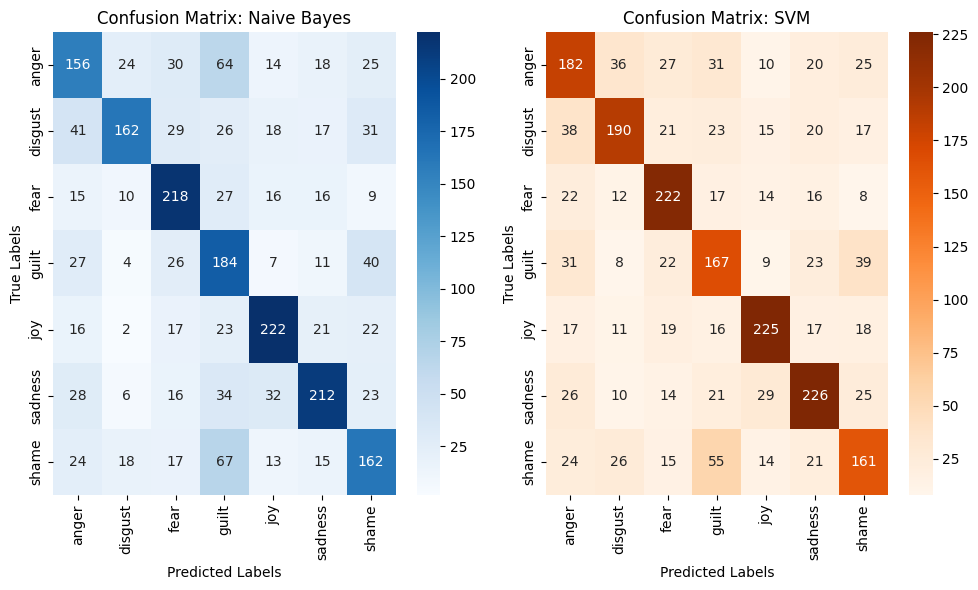

In [182]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix for Naive Bayes classifier
conf_matrix_nb = confusion_matrix(Y_test, Prediction_for_test_dataset)

# Calculate confusion matrix for SVM classifier
conf_matrix_svm = confusion_matrix(Y_test, Prediction_for_test_dataset_svm)

# Plot confusion matrix for Naive Bayes classifier
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_nb, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix: Naive Bayes')

# Plot confusion matrix for SVM classifier
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_svm, annot=True, cmap='Oranges', fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix: SVM')

plt.tight_layout()
plt.show()


# F1-Score Comparison: Plot a bar chart comparing the F1-scores of both classifiers for each class. This provides insights into the performance of each classifier across different emotion categories.

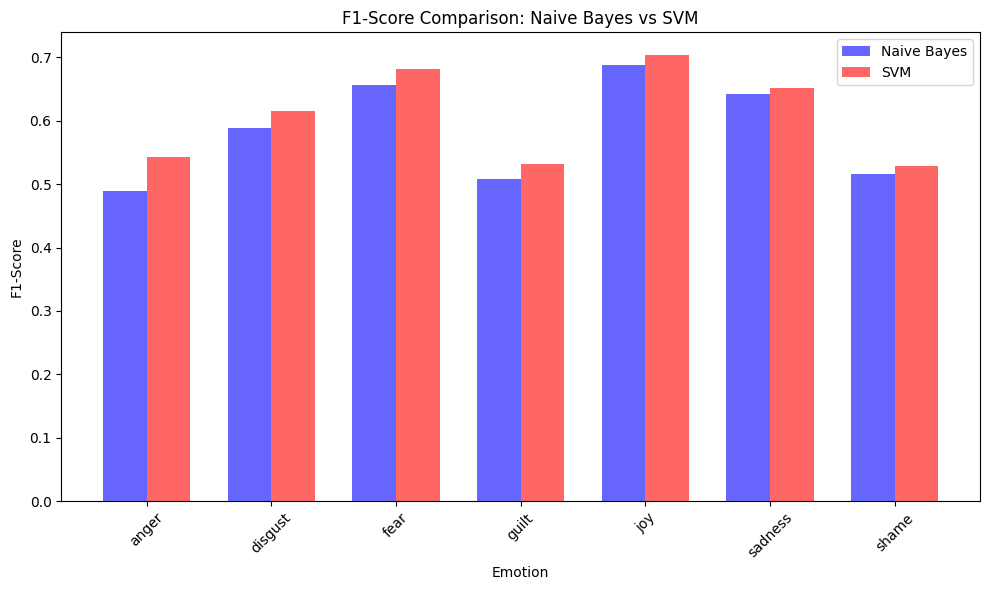

In [184]:
import numpy as np
from sklearn.metrics import f1_score

# Define the width of each bar
bar_width = 0.35

# Define the position for each set of bars
positions = np.arange(len(classes))
# Calculate F1-score for Naive Bayes classifier
f1_scores_nb = f1_score(Y_test, Prediction_for_test_dataset, average=None)

# Calculate F1-score for SVM classifier
f1_scores_svm = f1_score(Y_test, Prediction_for_test_dataset_svm, average=None)
# Plot grouped bar chart for F1-score comparison
plt.figure(figsize=(10, 6))
plt.bar(positions - bar_width/2, f1_scores_nb, width=bar_width, color='blue', alpha=0.6, label='Naive Bayes')
plt.bar(positions + bar_width/2, f1_scores_svm, width=bar_width, color='red', alpha=0.6, label='SVM')
plt.xlabel('Emotion')
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison: Naive Bayes vs SVM')
plt.xticks(positions, classes, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Bar Plot of Accuracy: Create a bar plot showing the accuracy of svm, naive bayes, logistic, lstm and rnn classifiers on the testing dataset. This provides a simple comparison of overall performance

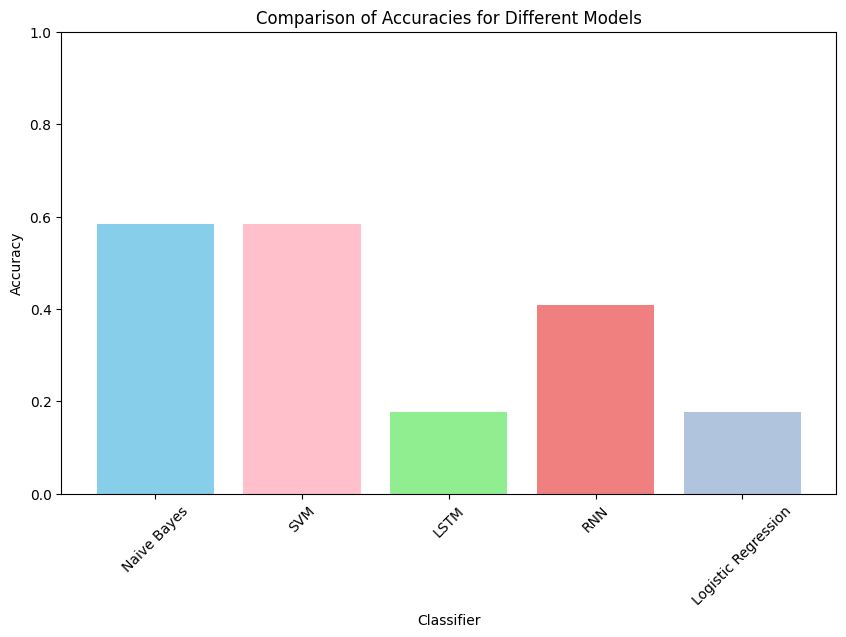

In [186]:
import matplotlib.pyplot as plt

# Define the accuracies for all models
accuracies = {
    'Naive Bayes': accuracy_nb,
    'SVM': accuracy_svm,
    'LSTM': accuracy,
    'RNN': accuracy_rnn,
    'Logistic Regression': accuracy_LOGISTIC
}

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'pink', 'lightgreen', 'lightcoral', 'lightsteelblue'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracies for Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()
